# QTS Trading Project
## Time-series Momentum in Cryptocurrency Markets

Armand Dang (12187118), Angelo Pacheco (12457996), Brennan Stevens, Andrew Park(12452997)

## Project Idea

### Introduction

In recent years, the cryptocurrency market has evolved into a complex, highly volatile environment where traditional asset pricing models often fall short. This notebook presents a time-series momentum trading strategy specifically tailored for the cryptocurrency market. Our approach draws inspiration from both the comprehensive study “Time-Series and Cross-Sectional Momentum in the Cryptocurrency Market” by Han, Kang, and Ryu, and the seminal work by Moskowitz, Ooi, and Pedersen (2010) on time-series momentum. The latter original paper hypothesizes that persistent momentum effects can arise from an initial underreaction to new information followed by a delayed overreaction—a dynamic that is especially pronounced in volatile markets.

### Motivation
Momentum is a classic trading strategy based on the idea that past winners are likely to continue performing well, while past losers are likely to continue underperforming. This strategy can be executed through either a time-series or cross-sectional approach. Building on the insights from Moskowitz, Ooi, and Pedersen (2010), we hypothesize that the time-series momentum phenomenon in the cryptocurrency market is driven by an initial underreaction—where prices do not immediately reflect new information—followed by a delayed overreaction as market participants adjust their positions. This behavioral dynamic is particularly relevant in the cryptocurrency space, where a high influx of unsophisticated retail investors and inherent market volatility can amplify such effects.

Several unique characteristics of the cryptocurrency market further motivate the design of this strategy:

* __High Volatility and Fat Tails__: Cryptocurrencies exhibit extreme price movements and fat-tailed return distributions, leading to substantial risks if not properly managed.

* __Interim Price Fluctuations__: Unlike traditional markets, cryptocurrencies can experience significant intra-day price swings. Prior research has shown that overlooking daily mark-to-market adjustments can result in a serious underestimation of liquidation risks.

* __Transaction Costs and Liquidity Considerations__: In markets where even small tick sizes and transaction fees can erode profitability, incorporating realistic transaction cost assumptions is essential.
* __Risk Management__:  Given the pronounced overreaction and jump risks, our strategy is designed to be robust by focusing on long-only positions. Empirical evidence suggests that time-series momentum in bullish regimes offers a more favorable risk-reward profile, whereas short positions tend to amplify losses.

This refined approach aims to leverage the inherent behavioral biases in the market, as identified by Moskowitz, Ooi, and Pedersen (2010), to develop a profitable and risk-managed trading strategy in the dynamic landscape of cryptocurrencies.

### Methodology - Time Series Momentum Trading

#### Portfolio Formation
We will be attempting to run our analysis using 3 approaches: 2 Market Portfolio techniques and individually analysins time-series momentum for each crypocurrency available in the universe.

1. Market Portfolio
    1. Value-Weight all of the coins in the universe
        1. Value is defined as the Market Capitilization, which is equivalent to $Price \times Circulating\; Supply$
        2. Circulating supply represents the number of coins that are circulating in the market and not held by private investors or under stacking.
    2. Equal-Weight all of the coins in the universe

2. Individual analysis - similar to equal weighted, but we do not aggregate the universe to produce a market portfolio. 
* We treat each cryptocurrency independently and conduct a timeseries momentum analysis individually.
* In this case the weights are equally weighted in each coin which raises us a long / short indicator.
* Weigh each coin in each side (long or short), $w_{i, side}=\frac{1}{n_{side}}$, where $n_{side}$ is the total number of coins in the long or short, depending on the direction of the signal for the coin.
* Note that if we have both long and short signals, the total sum of weights should sum to 0. If long-only, it should sum to 1. If short only, it should sum to -1.

#### Employ Percentile rank regressions

1. Specify a look-back period `j` and holding period `k`

1. For each day, $t$, obtain time-series percentile rank of previous $t-j$ historical returns, based on `j`-period returns. This time series will be our independent variable.

* Assuming current day is $t$, this can be done by taking the $j$-day past returns, $r_{t, t-j}, r_{t-j, t-2j},...$ for the entire historical sample available. 

* $r_{t-j, t}$ is the $j$-period log-return from time $t-j$ to time $t$:
$r_{t-j, t} = ln\left(\frac{P_{t}}{P_{t-j}}\right)$, where $P_{t}$ is the price of the cryptocurrency on $t$.

* Rank and divide by the number of observations to obtain the time-series percentile rank. These numbers should be in between 0 and 1. For example, assuming $\;r_{t-j, t}\;$ is ranked 8 out of a sample of 10,  $\;p_{t-j, t} = 0.8$

* __Why percentile rank?__
    * Percentile ranks transform raw returns into values between 0 and 1, standardizing the data across different time periods and assets. This normalization mitigates issues arising from extreme returns—common in cryptocurrency markets due to their high volatility and fat tails—ensuring that no single extreme value disproportionately influences the analysis.
    * The percentile rank can help determine the relative position of a return compared to its historical returns.
    * The percentile rank can give a representation of the current market state - high percentile rank indicates a bullish market and a low rank a bearish market.
    
3. Get the look-ahead percentile rank, for a given holding period `k`. The timeseries, $p_{t, t+k}$ is our dependent variable.

4. Conduct following regression: $p_{t, t+k}=\alpha+\beta p_{t-j,t} + \epsilon _t$ over various `j` and `k`.

* Analyze the coefficient, $\beta$, and corresponding t-statistic. Find significant `j` and `k` combinations.

* Note that $\mathbb{\beta}$ signifies the presence of momentum, where a higher coefficient implies a stronger momentum.


#### Backtesting
When the look-back period return falls within the top `q`-percentile of the historical returns, the strategy takes a long position in the market portfolio. Conversely, if the return falls within the bottom `q`-percentile, it takes a short position in the market portfolio. Otherwise, it clears all positions and holds cash. Note that this strategy holds either a long position or a short position on a given date but not both - if we are using a market porfolio. However, it can hold a mix of long and short positions if we apply the time-series momentum strategy to individual coins.

The implementation of this strategy is rather straightforward:

1. For a given time $t$, get the look-back period return percentile rank. If criteria met, enter a long/short position.
2. Rebalance based on the frequency of the holding period - calculate PnL.

##### Considerations / Notes
1. Transaction Cost

    - Realistic Modeling:

        Transaction costs must be accurately modeled to reflect real-world trading conditions. This includes broker or exchange fees, bid-ask spreads, and potential slippage during execution.
    - Impact on Strategy Profitability:

        Even small costs per trade can compound over multiple transactions especially if frequently rebalancing, particularly in volatile markets like cryptocurrencies, potentially eroding the profit margins of the strategy.

    - Market-Specific Factors:

        For cryptocurrencies, transaction costs can vary significantly across exchanges and during periods of high volatility. It's crucial to incorporate these nuances into the backtesting framework.

2. Mark to Market PnL Calculation

    - Daily Valuation:

        Mark-to-market PnL involves revaluing all open positions at current market prices at the end of each trading day. This provides an accurate, up-to-date measure of profit and loss.

    - Risk Management:

        Given the high volatility in cryptocurrency markets, daily PnL calculations are essential for assessing margin requirements and managing risk.

3. Leverage and Margin mode:

    - Margin Requirements and Calls:

        When trading on margin, it's important to model realistic margin requirements. The strategy should simulate margin calls and potential forced liquidations if losses erode the margin buffer.

    - Cost of Leverage:
    
        Interest and borrowing costs associated with margin trading must be factored into the performance calculations. These costs can be substantial in volatile markets and impact the net returns.

4. Day-of-the-week effects
    
    - Impact of the rebalancing day:

        Impact of the rebalancing day is nontrivial. Depending on when the study is began, as well as holding period, the strategy can perform differently. It is important to assess the effect of day-of-the-week.

### Performance Evaluation / Analysis

We evaluater performance using common metrics, Sharpe, Annualized Return and Volatility, Max Drawdown, and Sortino Ratio.
We also take a look at the performance of our strategy with respect to the equities market, and a buy and hold strategy.

1. Optimal `j` and `k` values
2. Optimal threshold, `q`
3. Optimal Portfolio construction

## Data Exploration

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import datetime

from src.data_binance import download_data
from src.preprocess import *
from src.cmc_webscraper import scrape_cmc
from src.cmds import *

### Download data from Binance

In [2]:
start_date = '2015-01-01'
end_date = '2025-02-24'
interval='1d'
filepath = 'data/raw/'

raw_data = pl.from_pandas(download_data(start_date, end_date, interval, filepath=filepath))
raw_data.head(3)

master_crypto_data_2015-01-01_2025-02-24_1d.parquet loaded successfully.


Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Ticker
"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str,str,str,str
2019-09-23 00:00:00 UTC,"""9930.13000000""","""9930.13000000""","""9930.13000000""","""9930.13000000""","""0.00100000""","""1569283199999""","""9.93013000""","""1""","""0.00000000""","""0.00000000""","""0""","""BTCUSDT"""
2019-09-24 00:00:00 UTC,"""9637.93000000""","""9665.05000000""","""7996.45000000""","""8519.67000000""","""202.35079900""","""1569369599999""","""1739432.08920509""","""2345""","""125.93546400""","""1075623.60280331""","""0""","""BTCUSDT"""
2019-09-25 00:00:00 UTC,"""8528.12000000""","""8724.77000000""","""8247.78000000""","""8435.28000000""","""55.41797100""","""1569455999999""","""469361.69055629""","""763""","""29.05942700""","""246049.20514584""","""0""","""BTCUSDT"""


### Data cleaning and processing

In [3]:
close_prices = pivot_value(raw_data, value_col='Close')
tickers = close_prices.columns[1:]
close_prices.head(3)


date,BTC,ETH,XRP,BCH,LTC,BNB,ADA,BAT,ETC,XLM,ZRX,DOGE,ATOM,NEO,VET,QTUM,ONT,KNC,VTHO,COMP,MKR,ONE,BAND,STORJ,UNI,SOL,EGLD,PAXG,OXT,ZEN,FIL,AAVE,GRT,SHIB,CRV,AXS,…,PROM,DIA,LOOM,STMX,POLYX,IOST,ARB,FLOKI,XEC,BLUR,ANKR,DAI,DASH,HBAR,ICX,IOTA,RVN,XNO,XTZ,ZIL,ORBS,ADX,FORT,SUI,ONG,G,RENDER,BONK,MAGIC,PEPE,WIF,IOTX,PNUT,PENGU,POL,TRUMP,NEIRO
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2019-09-23,9930.13,209.55,0.27311,306.91,73.58,19.8787,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2019-09-24,8519.67,167.09,0.23264,221.2,57.67,15.8755,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2019-09-25,8435.28,170.0,0.24603,226.25,57.5,16.0652,0.039,0.1633,4.9138,0.05727,0.2102,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


#### Number of available data
Since some of the close price does not start as of the starting date, let us understand how the number of available tickers grows with time.

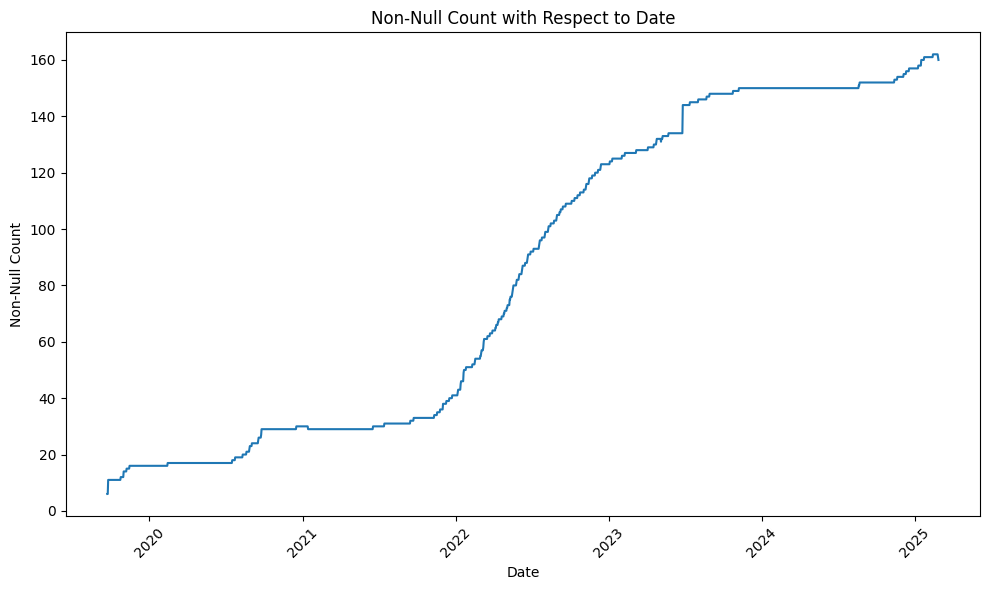

In [4]:
close_prices_analysis = plot_valid_tickers(close_prices)

In [5]:
print(f'Pct Change of available tickers and their counts on key dates:')
close_prices_analysis.filter(pl.col('pct_change') != 0)[['date', 'pct_change', 'non_null_count']].drop_nulls().sort('date', descending=False).head(10)

Pct Change of available tickers and their counts on key dates:


date,pct_change,non_null_count
date,f64,i64
2019-09-25,0.833333,11
2019-10-25,0.090909,12
2019-11-01,0.166667,14
2019-11-08,0.071429,15
2019-11-15,0.066667,16
2020-02-14,0.0625,17
2020-07-17,0.058824,18
2020-07-24,0.055556,19
2020-08-11,0.052632,20


Given the data, a decent choice to choose the starting date of our analysis would be from __2019-09-25__, so that 11 tickers can be captured.

However, by reducing the sample size by about 2 months, 16 tickers can be included if starting date is taken to be __2019-11-15__.

For our study, we will be using the starting date of __2019-11-15__, which will give us a universe of 16 cryptocurrencies to trade.

_We can also consider a strategy which dynamically increases the crypto universe as we traverse through time. However, as a base case, we will fix the crypto universe._

#### Filtering for the relevant universe


In [6]:
start_date = '2019-11-15'

close_prices = filter_date(close_prices, start_date)
close_prices.head(3)

date,BTC,ETH,BCH,LTC,BNB,ADA,BAT,ETC,XLM,ZRX,DOGE,ATOM,NEO,VET,QTUM
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2019-11-15,8473.65,180.09,263.67,57.6,20.2805,0.04426,0.2508,4.5604,0.07215,0.277,0.0026473,3.955,12.015,0.007863,2.156
2019-11-16,8495.01,182.36,265.07,58.24,20.1868,0.0439,0.2674,4.6324,0.0713,0.2817,0.0026638,3.961,12.394,0.007246,2.144
2019-11-17,8511.33,183.75,265.74,59.15,20.1318,0.04502,0.2729,4.6217,0.0716,0.2759,0.0026342,3.907,12.067,0.007656,2.154


In [7]:
ret_df = get_pct_change_resampled(close_prices, dropna=True)
ret_df.head(3)

date,BTC,ETH,BCH,LTC,BNB,ADA,BAT,ETC,XLM,ZRX,DOGE,ATOM,NEO,VET,QTUM
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2019-11-16,0.002521,0.012605,0.00531,0.011111,-0.00462,-0.008134,0.066188,0.015788,-0.011781,0.016968,0.006233,0.001517,0.031544,-0.078469,-0.005566
2019-11-17,0.001921,0.007622,0.002528,0.015625,-0.002725,0.025513,0.020568,-0.00231,0.004208,-0.020589,-0.011112,-0.013633,-0.026384,0.056583,0.004664
2019-11-18,-0.038154,-0.029823,-0.071762,-0.055114,-0.051123,-0.040871,-0.035178,-0.054655,-0.064804,-0.051468,-0.035115,-0.074994,-0.059584,-0.030564,-0.08078


### Getting Market Caps
Webscrape weekly data from Coin Market Cap. Although it is not daily, it is sufficient to approximate the marketcap by taking the nearest available date, with respect to $t$ (rebalancing day).

In [8]:
tickers = ret_df.columns[1:]
start_filter = ret_df['date'].min()
end_filter = ret_df['date'].max()
market_cap_filename = 'Market_Caps'

try:
    market_caps = pl.read_parquet(filepath+market_cap_filename+'.parquet')
except:
    market_caps = scrape_cmc(start_filter, end_filter, tickers, filepath=filepath, filename='Market_Caps')
    market_caps = pl.from_pandas(market_caps)
    
market_caps = market_caps.select(['date'] + [col for col in market_caps.columns if col != 'date'])
market_caps = market_caps.with_columns(pl.col('date').cast(pl.Date))
market_caps

date,ADA,ATOM,BAT,BCH,BNB,BTC,DOGE,ETC,ETH,LTC,NEO,QTUM,VET,XLM,ZRX
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2019-11-17,1.1776e9,7.4831e8,3.7690e8,4.8693e9,3.1513e9,1.5486e11,3.2329e8,5.3556e8,2.0103e10,3.7949e9,8.5876e8,2.0660e8,4.2803e8,1.4467e9,1.6783e8
2019-11-24,9.2268e8,5.8280e8,2.8245e8,3.7196e9,2.3764e9,1.2733e11,2.8904e8,4.3397e8,1.5523e10,2.8497e9,6.4550e8,1.5681e8,2.9250e8,1.1407e9,1.4414e8
2019-12-01,1.0264e9,7.2602e8,2.6755e8,3.9221e9,2.4102e9,1.3422e11,2.8026e8,4.5545e8,1.6444e10,3.0415e9,6.5523e8,1.7200e8,3.9534e8,1.1648e9,1.5709e8
2019-12-08,1.0098e9,7.5231e8,2.5870e8,3.8919e9,2.4380e9,1.3685e11,2.7386e8,4.5401e8,1.6465e10,2.9318e9,6.4124e8,1.6907e8,3.9866e8,1.1257e9,1.4326e8
2019-12-15,9.5032e8,8.5702e8,2.6147e8,3.7676e9,2.2538e9,1.2948e11,2.6379e8,4.4306e8,1.5589e10,2.7847e9,6.3226e8,1.7017e8,3.1093e8,1.0308e9,1.2573e8
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-26,3.3592e10,2.3867e9,3.3931e8,8.4358e9,9.5001e10,2.0347e12,4.9706e10,3.9486e9,3.8998e11,8.8450e9,9.6491e8,3.0264e8,3.6733e9,1.2415e10,3.6711e8
2025-02-02,2.8210e10,1.9026e9,2.8053e8,7.1323e9,8.7996e10,1.9361e12,3.9561e10,3.3859e9,3.4574e11,8.2648e9,8.0771e8,3.2169e8,3.0486e9,1.0823e10,2.8152e8
2025-02-09,2.4029e10,1.7897e9,2.6430e8,6.4417e9,8.7859e10,1.9128e12,3.6890e10,3.0426e9,3.1686e11,8.1148e9,7.4125e8,2.9492e8,2.5920e9,9.6236e9,2.6323e8


## Data Analysis

### Correlation Matrix

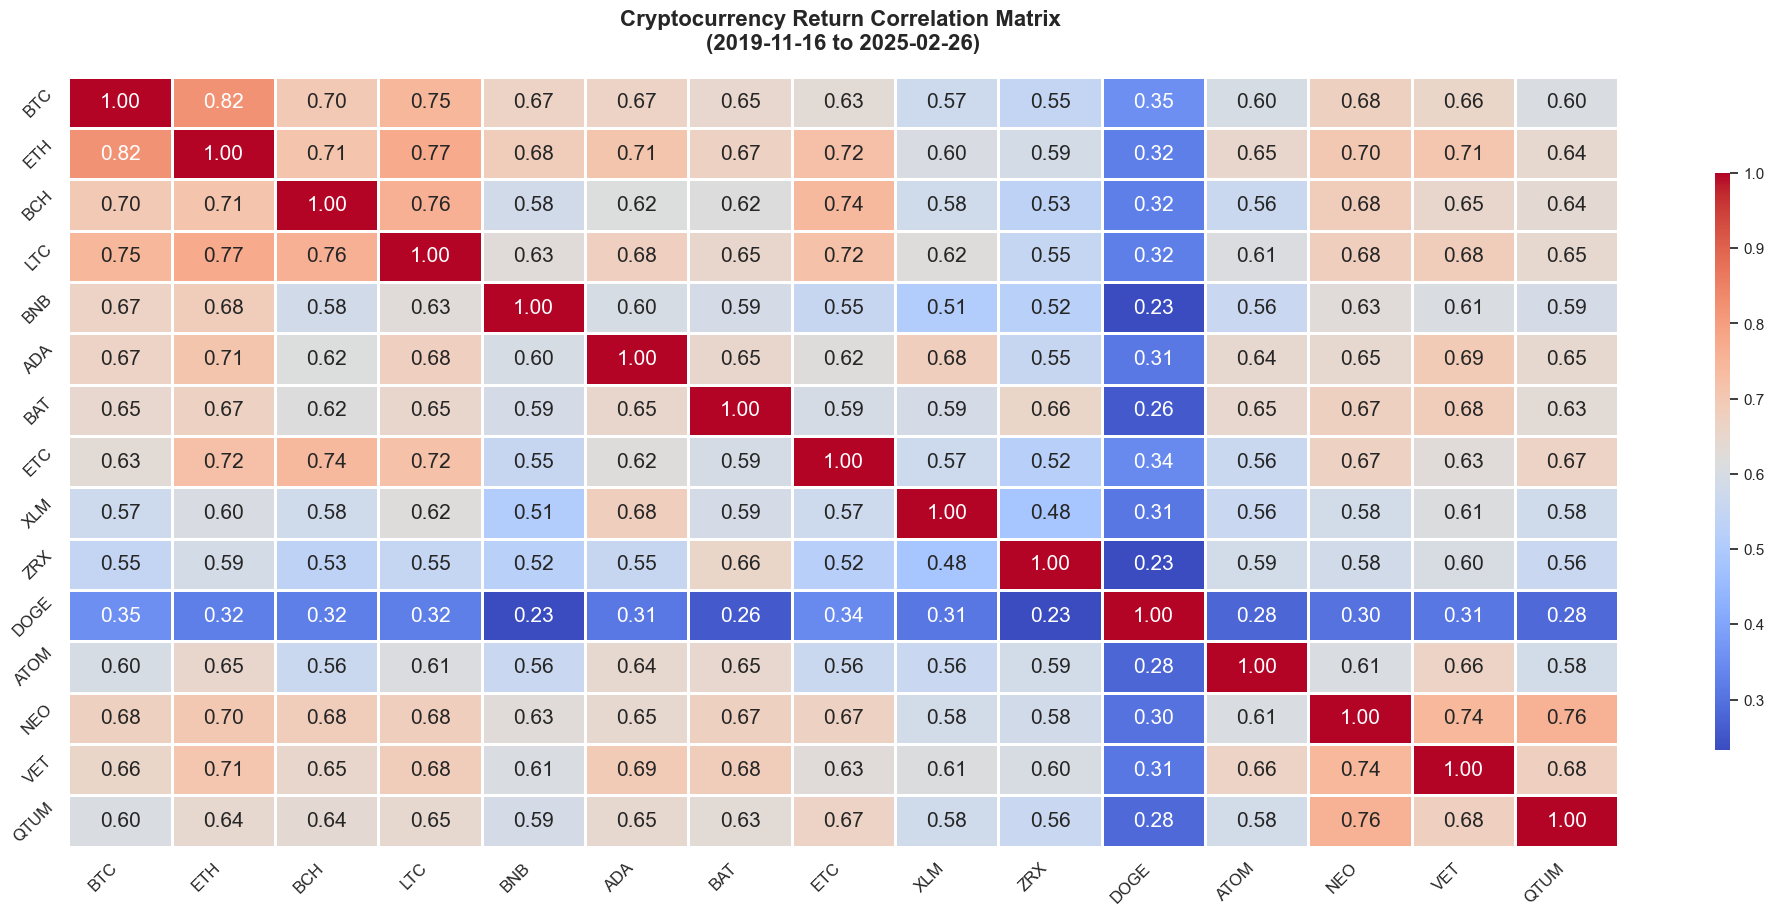

In [9]:
corr_matrix = get_corr_matrix(ret_df)

#### Observations
From a high-level view, several clear patterns emerge in these inter‐cryptocurrency correlations:

1. **Overall High Correlation Among Large‐Cap Coins**  
   Most of the major cryptocurrencies (e.g., BTC, ETH, BCH, LTC) display relatively high pairwise correlations, typically in the 0.70–0.80 range. This suggests that large‐cap coins often move in tandem, reflecting broad market sentiment rather than coin‐specific fundamentals.

2. **Notable Outlier: DOGE**  
   DOGE shows distinctly lower correlations (often around 0.30) with other cryptocurrencies. This separation may stem from its unique retail‐driven price action, periodic meme‐based surges, and differing demand dynamics.

3. **Mid‐Tier and Alternative Layer‐1 Coins**  
   Coins such as BNB, ADA, and NEO still exhibit considerable correlation to the large‐cap group (often in the 0.60–0.70 range), although slightly lower than the BTC–ETH–LTC cluster. This moderate correlation could reflect a partial decoupling in response to their different use cases, technology, or staking mechanisms.

4. **Implications for Portfolio Construction**  
   - **Diversification Constraints:**  
     The general level of elevated correlation among many coins means investors should not expect a large diversification benefit by simply holding multiple large‐cap cryptocurrencies.  
   - **Alternative Bets:**  
     Lower‐correlated assets like DOGE (or other emerging coins not shown here) may help reduce overall portfolio volatility—though they come with their own idiosyncratic risks.

Overall, while the crypto market often moves in a unified fashion—particularly during strong bull or bear trends—there are still pockets of lower correlation that may offer diversification benefits or alpha opportunities for more nuanced strategies.

### ACF and PACF 
Take top and bottom 2 coins ranked by trading volume (excluding ETH and BTC - since we are analyzing those anyway).

We will use the trading volume with respect dates near the tail date.

Analysis will be conducted on  daily, weekly and monthly returns.

In [10]:
### Get tickers for plotting
top_bottom_n = 0
date_idx = -3

# get volumes
vols = pivot_value(raw_data, value_col='Volume')
vols = vols.select(close_prices.columns)

vol_usd = vols.filter(pl.col('date') == vols['date'][date_idx]).select(pl.all().exclude('date')) * close_prices.filter(pl.col('date') == close_prices['date'][date_idx]).select(pl.all().exclude('date'))
# Get the highest and lowest 3 tickers by volume in USD
highest_tickers = vol_usd.select(pl.all().exclude('date')).to_dict(as_series=False).keys()
highest_tickers = sorted(highest_tickers, key=lambda x: vol_usd[x][0], reverse=True)

# Remove specific tickers from the list
tickers_to_remove = ['BTC', 'ETH']
highest_tickers = [ticker for ticker in highest_tickers if ticker not in tickers_to_remove]

# Combine top and bottom n tickers, and include BTC and ETH
top_tickers = [None] if top_bottom_n == 0 else highest_tickers[:top_bottom_n]
bottom_tickers = [None] if top_bottom_n == 0 else highest_tickers[-top_bottom_n:]
tickers_to_plot = tickers_to_remove + top_tickers + bottom_tickers
tickers_to_plot = [ticker for ticker in tickers_to_plot if ticker is not None]
tickers_to_plot


['BTC', 'ETH']

#### Try with daily data

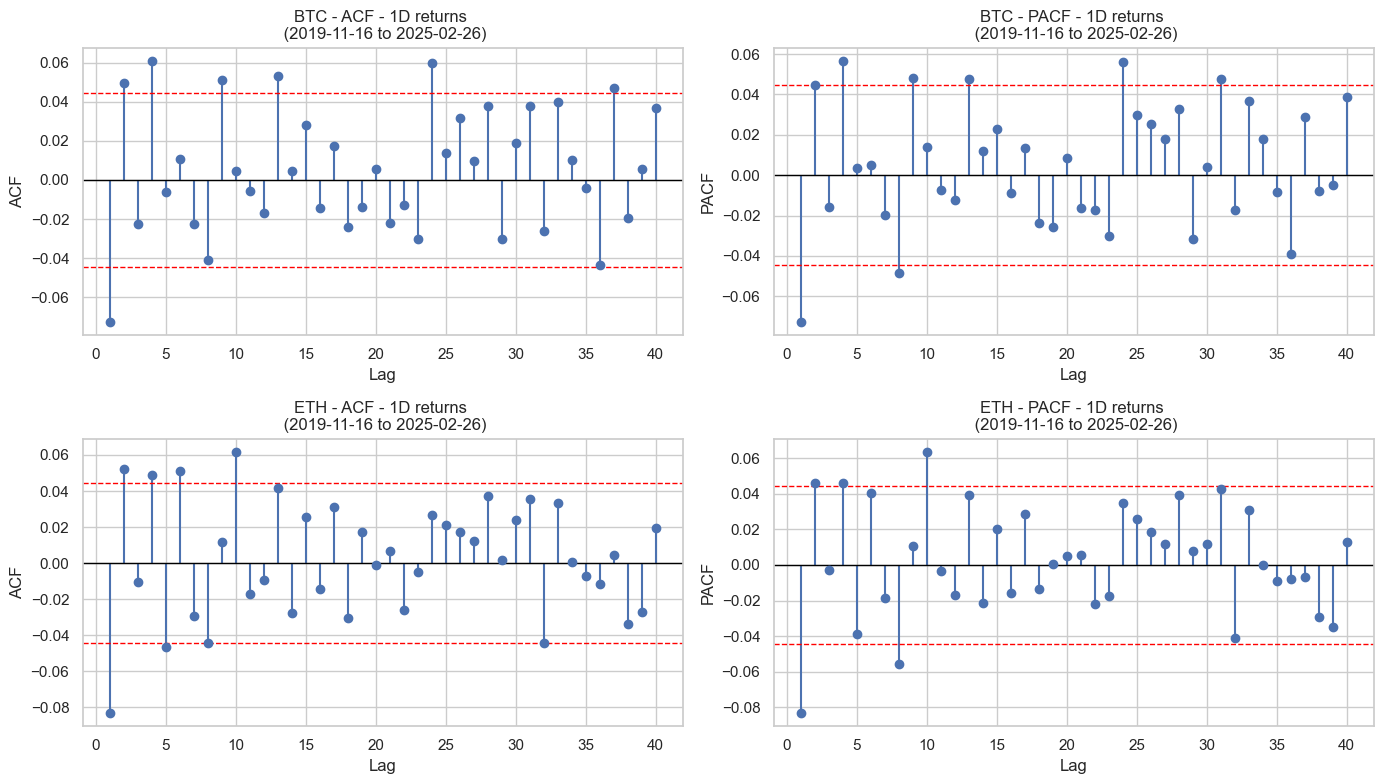

In [11]:
plot_acf_pacf(ret_df, tickers_to_plot, freq_title='1D')

#### Try with weekly data

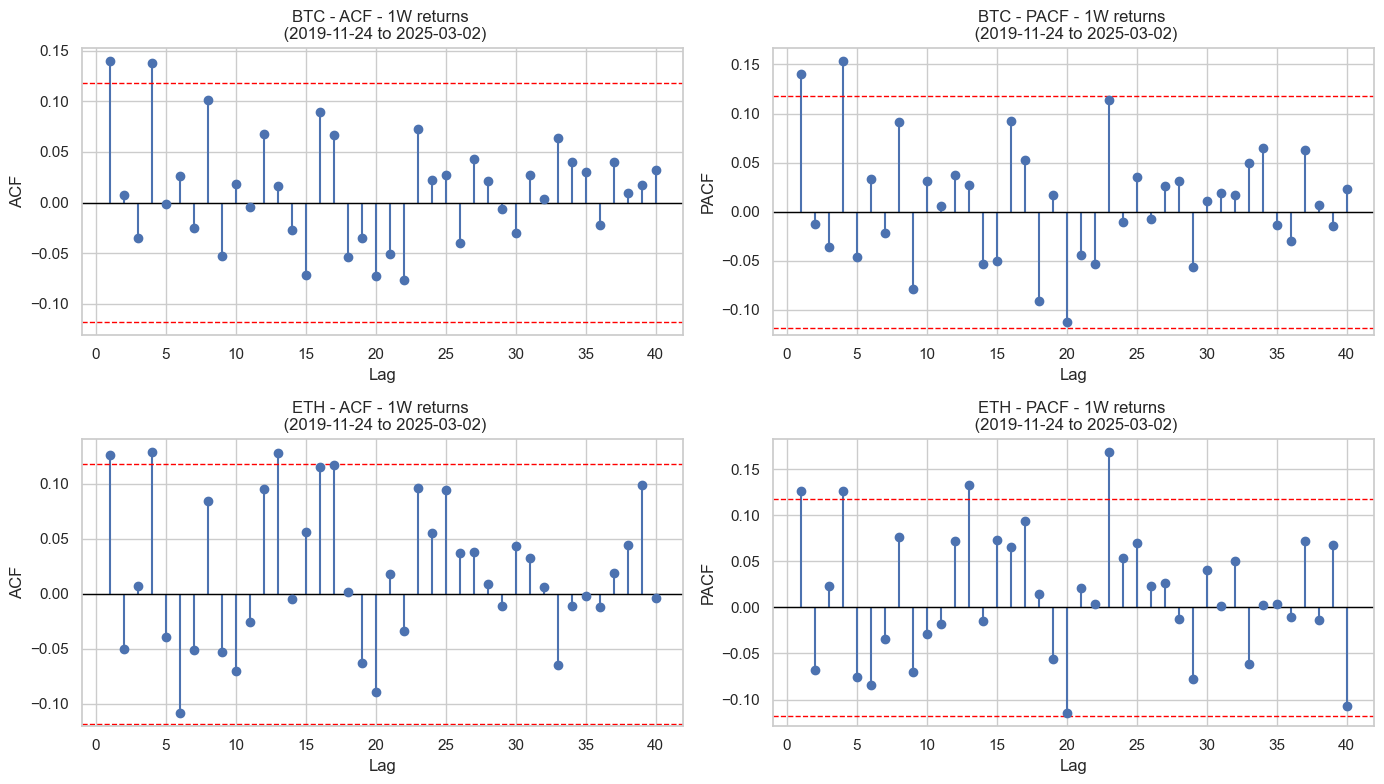

In [12]:
ret_df_1w = get_pct_change_resampled(close_prices, dropna=True, freq='1W')

plot_acf_pacf(ret_df_1w, tickers_to_plot, freq_title='1W')

#### Try with monthly data

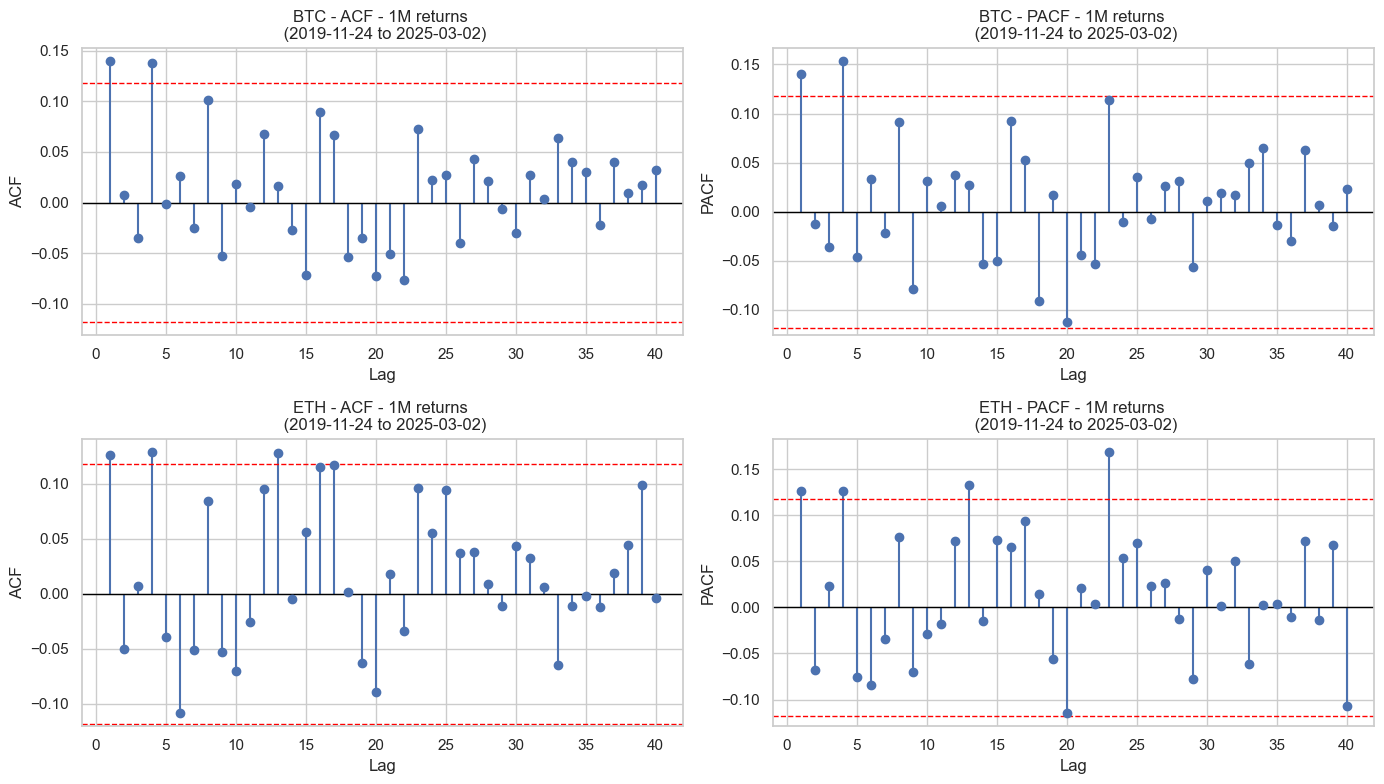

In [13]:
ret_df_1m = get_pct_change_resampled(close_prices, dropna=True, freq='1ME')

plot_acf_pacf(ret_df_1w, tickers_to_plot, freq_title='1M')

### Observations

- **Weak to Moderate Autocorrelation:** Consistent with many prior studies on liquid cryptocurrency markets, daily and weekly returns often approximate a random walk, especially for large‐cap assets like BTC and ETH.  
- **Possible Short‐Term Effects:** Small, sporadic spikes in the ACF/PACF could hint at short‐lived momentum or mean‐reversion windows, but these signals tend to be fairly weak.  

In summary, the ACF and PACF plots for BTC and ETH at daily, weekly, and monthly horizons show that while there may be occasional lags that breach significance levels, the overall structure is fairly close to what one would expect from a near‐efficient market.

### AR(p) Model
Analysis will be conducted on  daily, weekly and monthly returns, then taking an AR(p) model.


#### Investigate lag distribution of Betas and P-Values for daily returns

For below, we will conduct an AR(7) model on daily returns and inspect the lag-7 P-value and Beta

In [14]:
p=7
lag_list = [x+1 for x in range(p)]
freq='1D'

res = run_ar_regression(ret_df, tickers=None, p=p)
concat_df = extract_ar_params(res, lags = lag_list, concat=False)
coeff_df, pval_df = concat_df[0], concat_df[1]

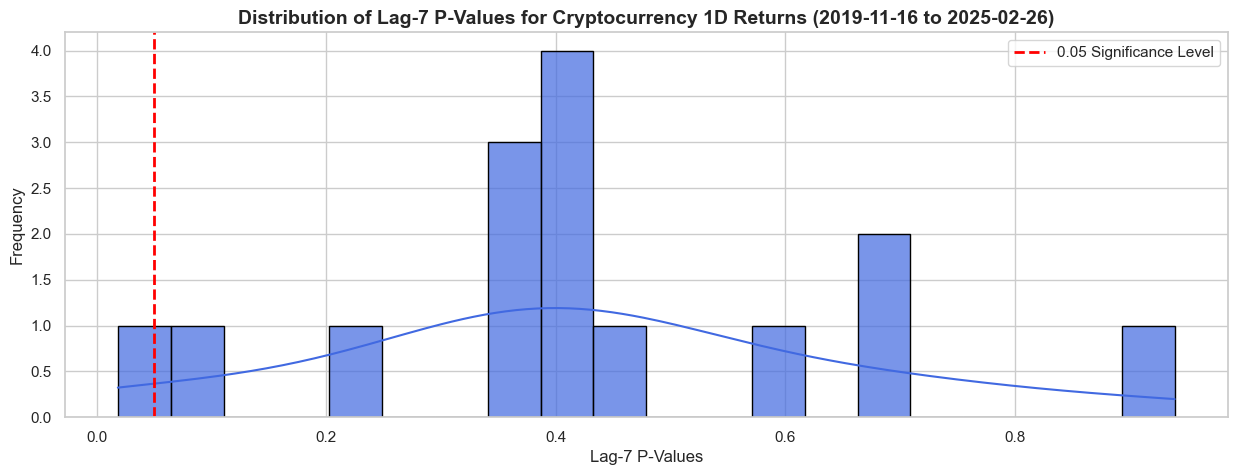

In [15]:
plot_dist(pval_df, lag=p, label='P-Values', freq=freq, min_date=ret_df['date'].min(), max_date=ret_df['date'].max(), kde=True, bins=20)

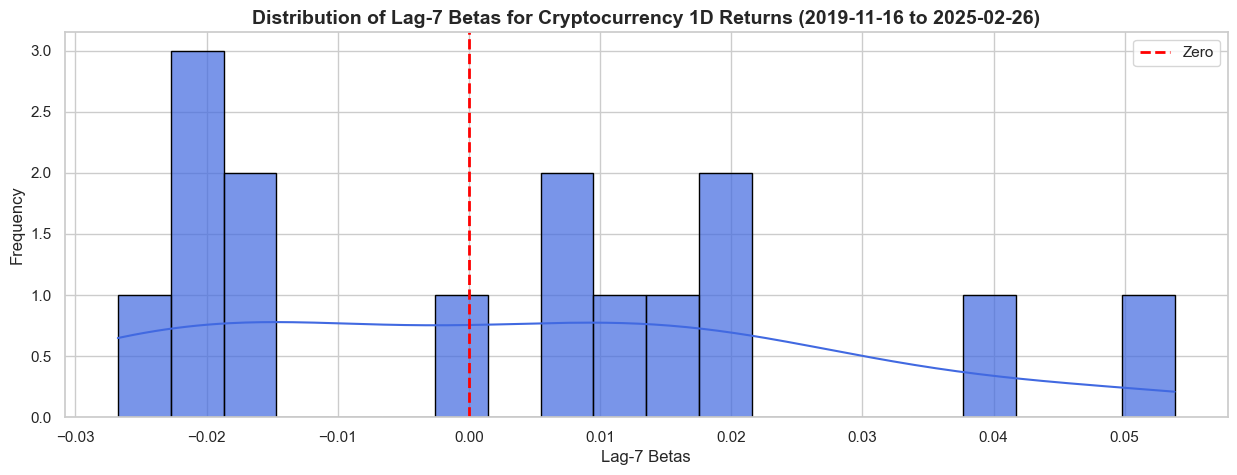

In [16]:
plot_dist(coeff_df, lag=p, label='Betas', freq=freq, min_date=ret_df['date'].min(), max_date=ret_df['date'].max(), kde=True, bins=20)

#### Investigate 2nd lag distribution of Betas and P-Values for weekly returns
For below, we will conduct an AR(4) model on weekly returns and inspect the lag-4 P-value and Beta

In [17]:
p=4
lag_list = [x+1 for x in range(p)]
freq = '1W'

res_1w = run_ar_regression(ret_df_1w, tickers=None, p=p)
concat_df_1w = extract_ar_params(res_1w, lags = lag_list, concat=False)
coeff_df_1w, pval_df_1w = concat_df_1w[0], concat_df_1w[1]

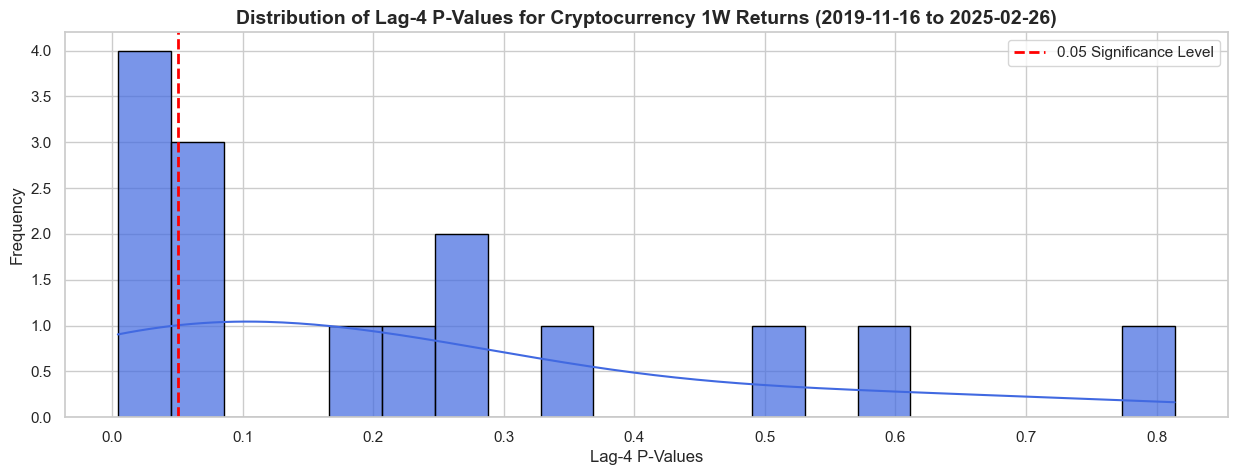

In [18]:
plot_dist(pval_df_1w, lag=p, label='P-Values', freq='1W', min_date=ret_df['date'].min(), max_date=ret_df['date'].max(), kde=True, bins=20)

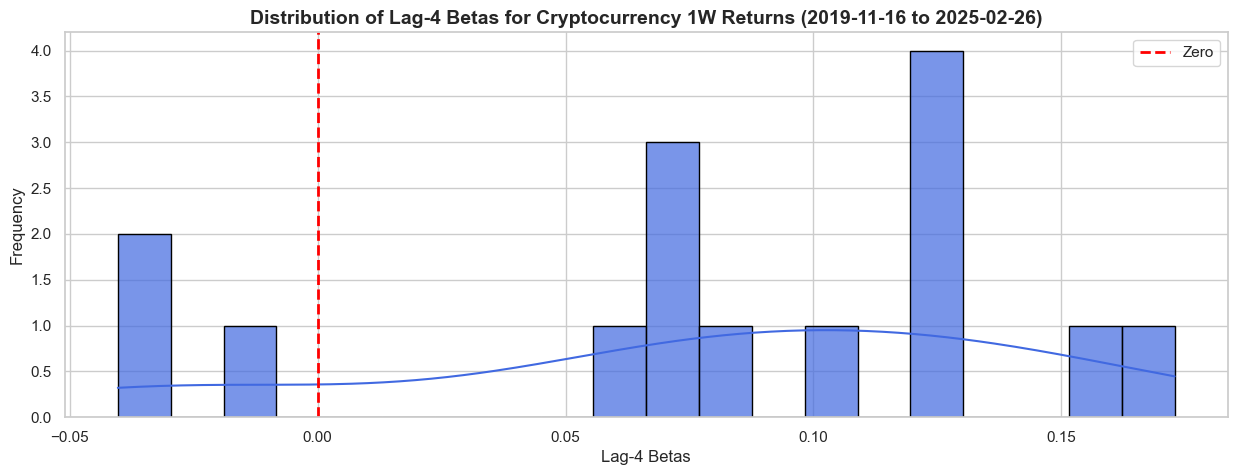

In [19]:
plot_dist(coeff_df_1w, lag=p, label='Betas', freq='1W', min_date=ret_df['date'].min(), max_date=ret_df['date'].max(), kde=True, bins=20)

#### Investigate 2nd lag distribution of Betas and P-Values for monthly returns
For below, we will conduct an AR(3) model on monthly returns and inspect the lag-3 P-value and Beta

In [20]:
p=3
lag_list = [x+1 for x in range(p)]
freq = '1M'

res_1m = run_ar_regression(ret_df_1m, tickers=None, p=p)
concat_df_1m = extract_ar_params(res_1m, lags = lag_list, concat=False)
coeff_df_1m, pval_df_1m = concat_df_1m[0], concat_df_1m[1]

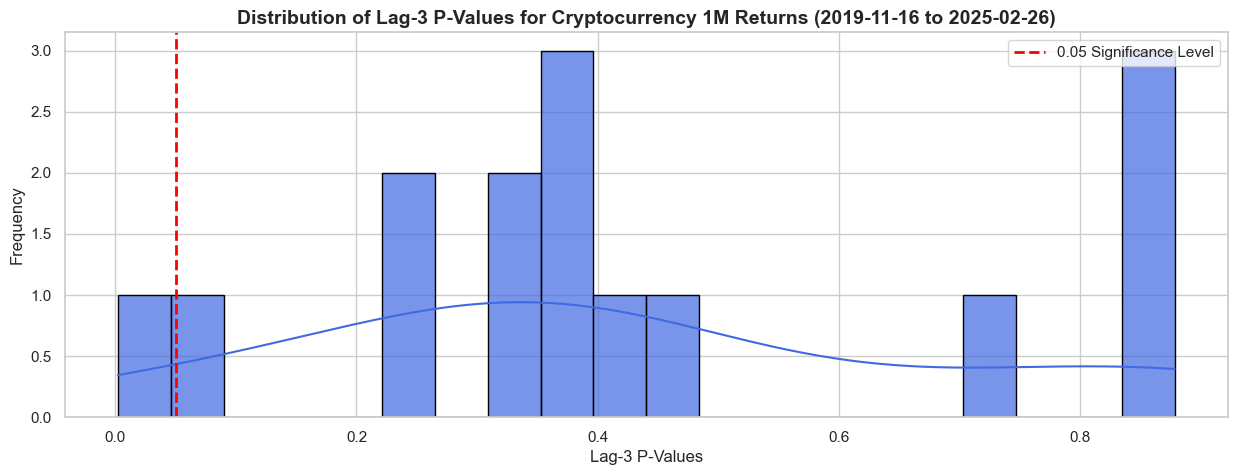

In [21]:
plot_dist(pval_df_1m, lag=p, label='P-Values', freq=freq, min_date=ret_df['date'].min(), max_date=ret_df['date'].max(), kde=True, bins=20)

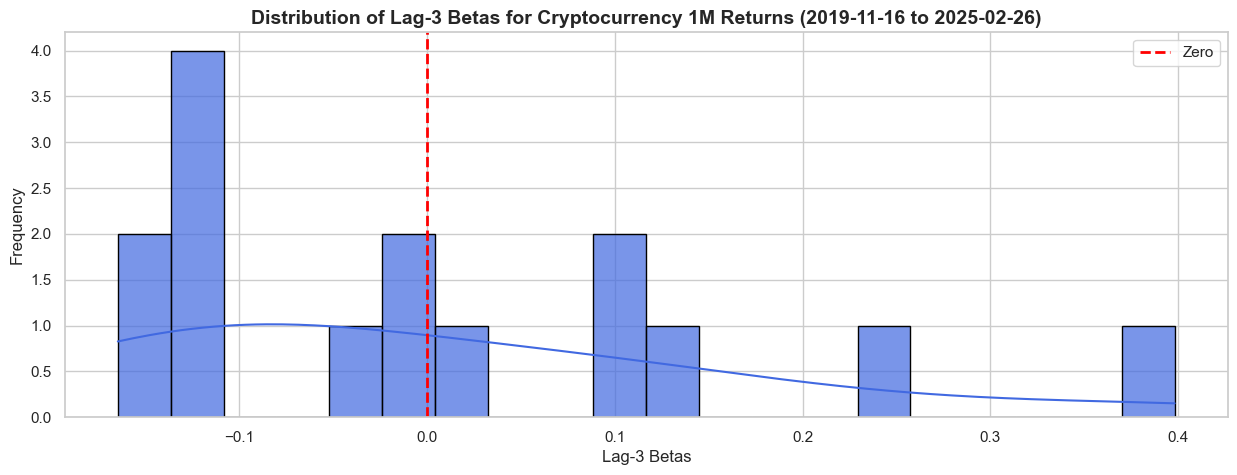

In [22]:
plot_dist(coeff_df_1m, lag=p, label='Betas', freq=freq, min_date=ret_df['date'].min(), max_date=ret_df['date'].max(), kde=True, bins=20)


### Observations
---
#### 1. Daily Returns (AR(7))

- **P‐Values**  
  - The majority of p‐values for the seventh lag hover well above the 0.05 threshold, indicating that, for most coins, lag‐7 daily returns are not significantly predictive of today’s return.  
  - A small subset of coins shows p‐values below 0.05, but no single strong pattern emerges (i.e., some are slightly negative, others slightly positive).
  
- **Betas**  
  - The betas themselves (the estimated AR coefficients) are fairly evenly dispersed around zero, with most lying between \(-0.03\) and \(+0.03\).  
  - This dispersion around zero suggests that, even in the minority of cases where the coefficient is significant, the effect size is quite modest.  

---

#### 2. Weekly Returns (AR(4))

- **P‐Values**  
  - More of the p‐values fall below 0.05 here than in the daily case—suggesting that some currencies may show a slightly stronger (yet still modest) weekly autocorrelation.  
  - However, the distribution remains skewed toward higher p‐values, so it is not a universal effect across all coins.

- **Betas**  
  - The estimated lag‐4 coefficients for weekly returns again cluster around zero, but with a small tail extending into positive territory. This could suggest a mild tendency for *some* coins to carry over positive (or negative) weekly returns.

---

#### 3. Monthly Returns (AR(3))

- **P‐Values**  
  - The histogram shows quite a few p‐values under the 0.05 threshold, but still without a clear, consistent pattern across all coins.  
  - Many p‐values remain in the higher ranges (0.2 to 0.8), suggesting that if any autocorrelation exists at the monthly level, it is not uniform across the market.

- **Betas**  
  - The distribution of lag‐3 betas for monthly returns often spreads from about \(-0.1\) to \(+0.2\).  
  - Notably, there is a cluster of slightly negative betas (indicating short‐term mean reversion) and a smaller cluster of positive betas (potential short‐term momentum), but the medians are still near zero overall.
---



## Overall Conclusions (Data)

1. **Weak Autocorrelation:**  
   Across daily, weekly, and monthly frequencies, most AR coefficients center around zero, and p‐values frequently exceed 0.05. This suggests the crypto returns studied here behave in a largely *weakly efficient* manner, leaving little room for simple AR‐based strategies.

2. **Occasional Pockets of Significance:**  
   In each frequency band, there is a tail of coins/lag combinations that do show statistical significance—but effect sizes remain modest. This implies that if an exploitable pattern exists, it likely requires further refinement (e.g., combining with cross‐coin signals, volatility metrics, or other macro variables).

3. **Greater Aggregation, Slightly Stronger Signals:**  
   Weekly and especially monthly data can reduce day‐to‐day noise, allowing mild autocorrelation patterns to emerge. However, even these are not large or uniformly present, indicating that persistent trend or mean‐reversion effects at the single‐coin level are not very robust.

In short, while one can find occasional evidence of AR patterns in select coins at certain lags, the overall picture suggests that _simple_ autoregressive signals on single‐coin returns are weak and inconsistent—especially when factoring in practical trading frictions like transaction costs.

### Why an AR Model Does Not Preclude Time-Series Momentum

A common misconception is that if an autoregressive (AR) model shows insignificant or near‐zero coefficients, then no time‐series momentum exists. In reality, low AR coefficients do not necessarily negate the presence of momentum, for several reasons:

1. **Momentum Is Often Multi-Period**  
   Traditional AR models focus on predicting today’s return from a _fixed, small number_ of past lags. By contrast, a time-series momentum strategy typically uses _cumulative_ returns over a window (e.g., 20‐day or 1‐month returns) to generate signals. Even if an AR model finds little predictability in one‐step returns, the market can still exhibit a gradual trend over multiple days or weeks.

2. **Nonlinear and Rank-Based Signals**  
   Momentum strategies often rely on percentile ranks or threshold rules to detect trends, whereas AR models are linear. Price dynamics, particularly in cryptocurrencies, can be dominated by bursts of volatility and shifts in investor sentiment, which are better captured with non‐linear filters. Low AR coefficients simply say, “no strong linear relationship at short lags,” not that “no sustained or non‐linear trends exist.”

3. **Delayed Overreaction Instead of Immediate Continuation**  
   Behavioral finance research (e.g., Moskowitz, Ooi, and Pedersen, 2010) points to an initial underreaction to new information followed by a gradual overreaction. Such a pattern can create momentum over multi‐period horizons even if a short‐lag AR model fails to detect it.

4. **High Volatility Masks Short-Lag Signals**  
   Cryptocurrency markets are famously volatile, which can drown out linear relationships at short lags. However, when returns are aggregated (e.g., into weekly or monthly windows) or when a longer look‐back period is used, a more persistent drift can emerge—one that a short‐lag AR test might not reveal.

5. **Diversification Across Multiple Coins**  
   An AR model typically focuses on one time series. A time-series momentum strategy, however, often operates on a broad basket of assets, as we will inspect with our two basket portfolio approaches. Even if each individual coin’s AR coefficients are small, the combined momentum effect across several coins can be meaningful.

Hence, while AR models can be informative for detecting certain types of autocorrelation, a weak or insignificant AR coefficient does not rule out the possibility of profitable time‐series momentum. The two approaches measure different aspects of market dynamics: short‐lag linear predictability vs. multi‐period or nonlinear trend persistence.

## Portfolio Formation
We will construct two crypto market portfolios, one is market cap weighted and the other is equal weighted.


In [28]:
# 1 Equal Weighted
equal_port_rets, equal_port_weights = equal_weight_portfolio(ret_df)

# 2 Market Cap Weighted
mcap_port_rets, mcap_port_weights = marketcap_weighted_portfolio(ret_df, market_caps)


## Percentile Rank Regressions 
Understanding $\beta$ and t-stats of various look-back period and holding period parameters: `j` and `k`, where:
$$p_{t,t+k} = \alpha + \beta p_{t-j,t} + \epsilon_t$$